In [ ]:
import pandas_datareader as pdr

###irfan khan lstm

In [ ]:
pip install pandas==1.3.3 pandas_datareader==0.10.0


In [ ]:

key = "39967091b8e696ed537def3dab3766663d404e03"

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

/usr/local/lib/python3.10/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-11-20 00:00:00+00:00,263.19,266.08,260.40,265.54,26609919,63.790643,64.491106,63.114417,64.360224,106439676,0.0,1.0
1,AAPL,2019-11-21 00:00:00+00:00,262.01,264.01,261.18,263.69,30348778,63.504640,63.989390,63.303469,63.911830,121395112,0.0,1.0
2,AAPL,2019-11-22 00:00:00+00:00,261.78,263.18,260.84,262.59,16331263,63.448894,63.788219,63.221062,63.645218,65325052,0.0,1.0
3,AAPL,2019-11-25 00:00:00+00:00,266.37,266.44,262.52,262.71,21029517,64.561395,64.578361,63.628251,63.674303,84118068,0.0,1.0
4,AAPL,2019-11-26 00:00:00+00:00,264.29,267.16,262.50,266.94,26334882,64.057255,64.752871,63.623404,64.699548,105339528,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2024-11-11 00:00:00+00:00,224.23,225.70,221.500,225.00,42005602,224.23,225.70,221.500,225.00,42005602,0.0,1.0
1252,AAPL,2024-11-12 00:00:00+00:00,224.23,225.59,223.355,224.55,40398299,224.23,225.59,223.355,224.55,40398299,0.0,1.0
1253,AAPL,2024-11-13 00:00:00+00:00,225.12,226.65,222.760,224.01,48566217,225.12,226.65,222.760,224.01,48566217,0.0,1.0
1254,AAPL,2024-11-14 00:00:00+00:00,228.22,228.87,225.000,225.02,44923941,228.22,228.87,225.000,225.02,44923941,0.0,1.0
1255,AAPL,2024-11-15 00:00:00+00:00,225.00,226.92,224.270,226.40,47923696,225.00,226.92,224.270,226.40,47923696,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

,close
0,263.19
1,262.01
2,261.78
3,266.37
4,264.29
...,...
1251,224.23
1252,224.23
1253,225.12
1254,228.22


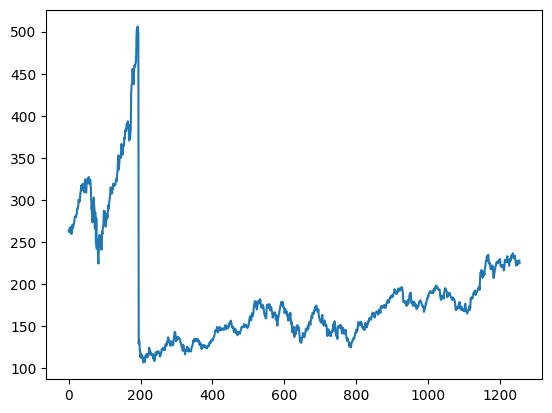

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

,close
0,263.19
1,262.01
2,261.78
3,266.37
4,264.29
...,...
1251,224.23
1252,224.23
1253,225.12
1254,228.22


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.39160927]
 [0.38865373]
 [0.38807765]
 ...
 [0.29625548]
 [0.30402004]
 [0.29595492]]


In [ ]:
training_size = int(len(df1) * 0.8)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :]

In [ ]:
training_size,test_size

(1004, 252)

In [ ]:
train_data

array([[0.39160927],
       [0.38865373],
       [0.38807765],
       ...,
       [0.19526612],
       [0.20187852],
       [0.2033062 ]])

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        dataX.append(dataset[i:(i + time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
print(X_train.shape), print(y_train.shape)

(903, 100, 1)
(903,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(151, 100, 1)
(904,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fix for data mismatch error
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        dataX.append(dataset[i:(i + time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Prepare input for LSTM
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Check consistency of shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Make sure y_train and y_test are matching with X_train and X_test respectively
# Ensure the training and testing data are consistent before fitting the model

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, verbose=1)


X_train shape: (903, 100, 1)
y_train shape: (903,)
X_test shape: (151, 100, 1)
y_test shape: (151,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - loss: 0.0327 - val_loss: 0.0087
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0090 - val_loss: 0.0012
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0088 - val_loss: 8.8804e-04
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0047 - val_loss: 4.9166e-04
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 - val_loss: 7.6518e-04
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0043 - val_loss: 7.2105e-04
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0029 - val_loss: 0.0010
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025 - val_loss: 8.2597e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - val_loss: 5.5663e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 2.7182e-04
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.1'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.033417984556627145

In [ ]:
# Predict values using the model
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Transform back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_train.reshape(-1, 1)), train_predict))
test_rmse = math.sqrt(mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), test_predict))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Train RMSE: 0.03341798455662713
Test RMSE: 0.021457494313791705


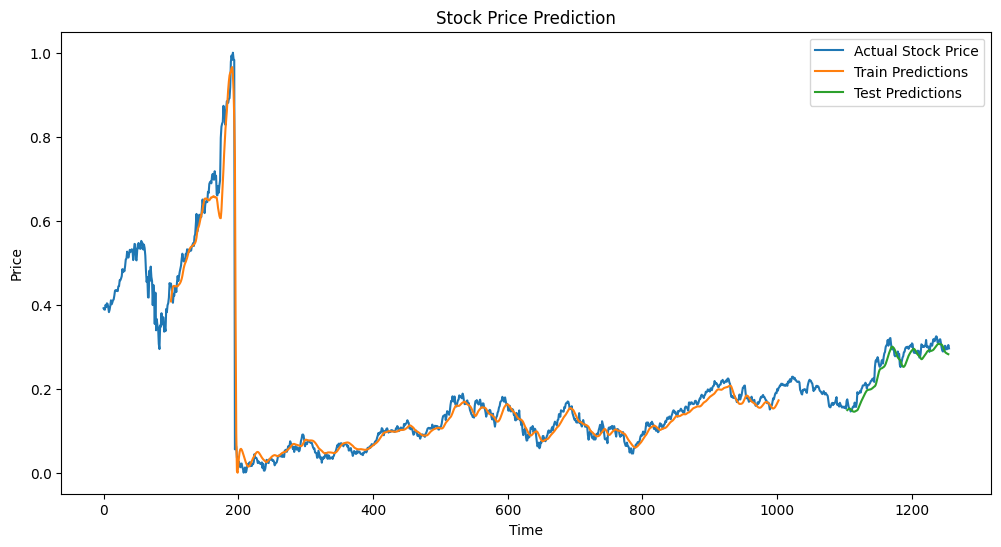

Predicted values for the next 10 days:
[[0.28253946]
 [0.28157654]
 [0.27977476]
 [0.27752161]
 [0.27507475]
 [0.27256489]
 [0.2700429 ]
 [0.26751918]
 [0.26498815]
 [0.26244032]]


In [ ]:
look_back = time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Future prediction for 10 days
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = time_step
i = 0

while i < 10:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
    else:
        x_input = np.array(temp_input).reshape(1, len(temp_input), 1)
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i += 1

# Transform future predictions back to original scale
future_predictions = scaler.inverse_transform(lst_output)

print("Predicted values for the next 10 days:")
print(future_predictions)


In [ ]:
len(test_data)

252

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 0)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.18063869755792106,
 0.1776581089542893,
 0.16974326862867878,
 0.16899185973700687,
 0.1793362554790231,
 0.17087038196618654,
 0.16278021289918598,
 0.1635566687539135,
 0.158422041327489,
 0.14755165936130238,
 0.1523356293049467,
 0.15919849718221663,
 0.14639949906073885,
 0.1458484658735128,
 0.15168440826549778,
 0.15125860989355033,
 0.14922980588603624,
 0.13763306199123349,
 0.140363180964308,
 0.1251346274264245,
 0.12455854727614268,
 0.14226675015654344,
 0.12726361928616153,
 0.12804007514088916,
 0.13184721352536,
 0.14822792736380713,
 0.12505948653725735,
 0.12633688165309953,
 0.11326236693800873,
 0.11939887288666245,
 0.09933625547902314,
 0.08946775203506574,
 0.10086412022542268,
 0.09693174702567309,
 0.10619912335629306,
 0.08510958046336875,
 0.0764182842830306,
 0.07701941139636814,
 0.09084533500313086,
 0.08395742016280527,
 0.0843581715716969,
 0.09252348152786471,
 0.10720100187852216,
 0.10519724483406384,
 0.10487163431433938,
 0.11113337507827176,
 0.

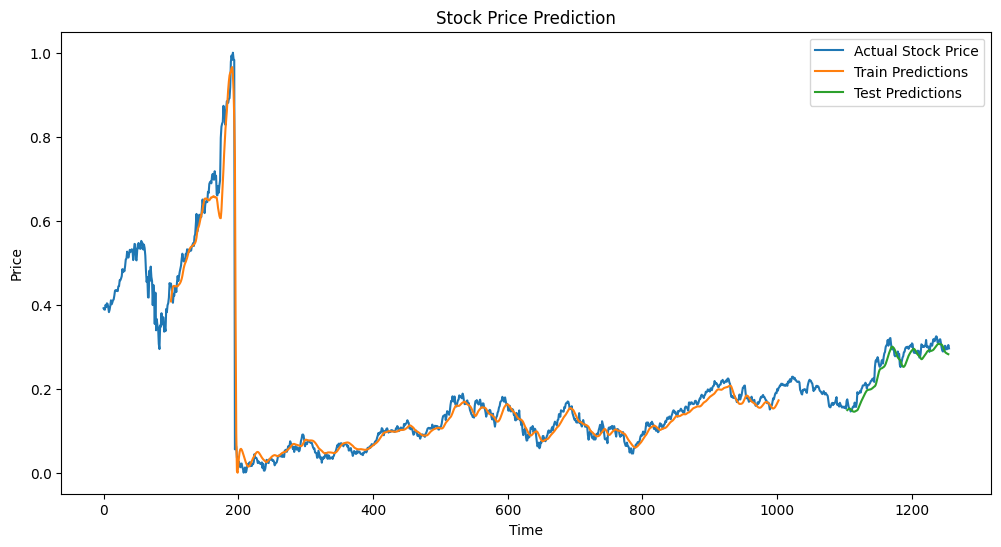

In [ ]:
look_back = time_step
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df1), label="Actual Stock Price")
plt.plot(trainPredictPlot, label="Train Predictions")
plt.plot(testPredictPlot, label="Test Predictions")
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1256

Predicted values for the next 10 days:
[[0.28253946]
 [0.28157654]
 [0.27977476]
 [0.27752161]
 [0.27507475]
 [0.27256489]
 [0.2700429 ]
 [0.26751918]
 [0.26498815]
 [0.26244032]]


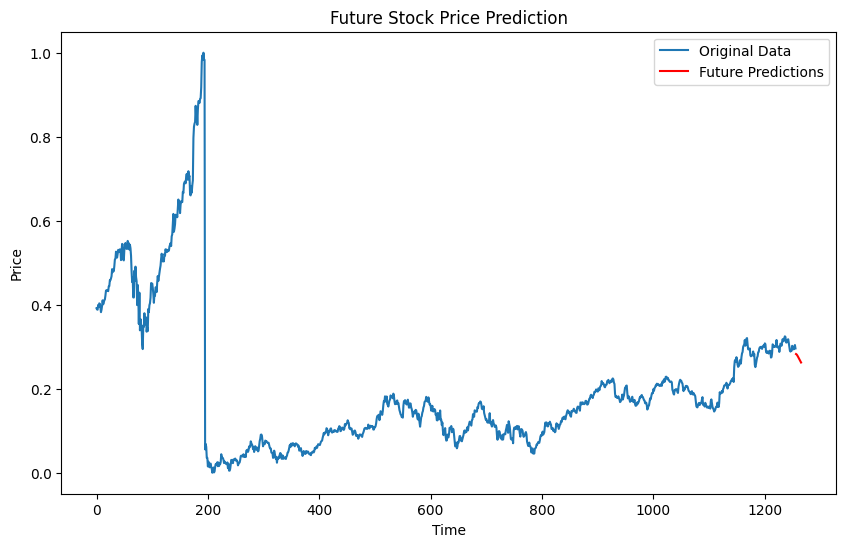

In [ ]:
# Future prediction for 10 days
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []

n_steps = time_step
i = 0

while i < 10:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:]).reshape(1, n_steps, 1)
    else:
        x_input = np.array(temp_input).reshape(1, len(temp_input), 1)
    yhat = model.predict(x_input, verbose=0)
    temp_input.extend(yhat[0].tolist())
    lst_output.extend(yhat.tolist())
    i += 1

# Transform future predictions back to original scale
future_predictions = scaler.inverse_transform(lst_output)

print("Predicted values for the next 10 days:")
print(future_predictions)

# Plot the extended future predictions
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(df1), label="Original Data")
plt.plot(range(len(df1), len(df1) + 10), future_predictions, label="Future Predictions", color="red")
plt.title('Future Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

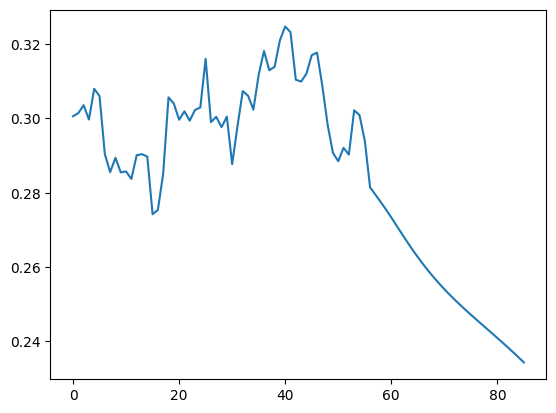

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

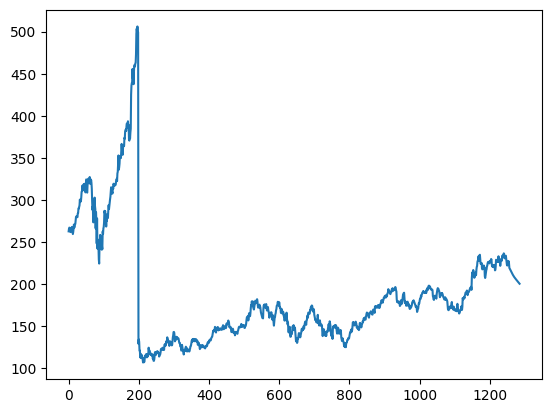

In [ ]:
plt.plot(df3)

In [ ]:
model.save('stock_market_model.h5')
print("Model saved in .h5 format.")

Model saved in .h5 format.


In [ ]:
model.save('stock_market_model_keras.keras')
print("Model saved in Keras SavedModel format.")

Model saved in Keras SavedModel format.
